Points
- mn accuracy performance not much difference than m+n
- m+n time scaling much better than mn
- hard to measure time scaling - feed forward time appears constant (gpu optimization?)
- hard to have mle comparison - eg 1 signal with our N takes some minutes
- kay comparison is very bad at anything below 8-10 SNR with our N and # samples

- citations of kay paper: many for radar, laser vibrometry, speech recognition, 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

import sys
sys.path.insert(0, '../')

from utils import *


Bad key "lines.dashed_pattern" on line 18 in
c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.dashdot_pattern" on line 19 in
c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.dotted_pattern" on line 20 in
c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
o

mapping from samples per feedfwd to total samples needed:
[([10, 15], 106), ([15, 20], 137), ([20, 25], 174), ([25, 30], 206), ([30, 35], 239), ([35, 40], 264), ([40, 45], 298), ([45, 50], 322), ([50, 55], 352), ([55, 60], 380)]


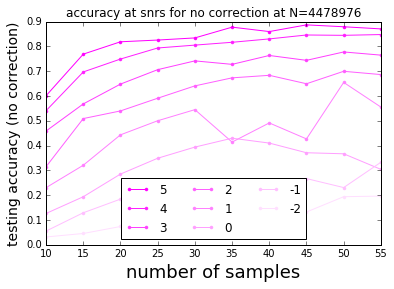

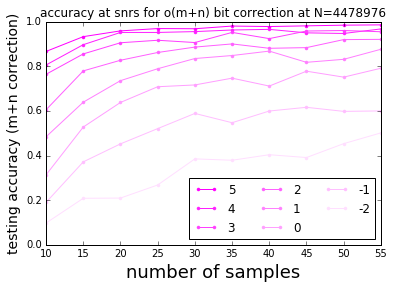

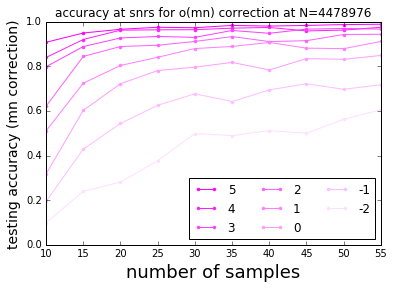

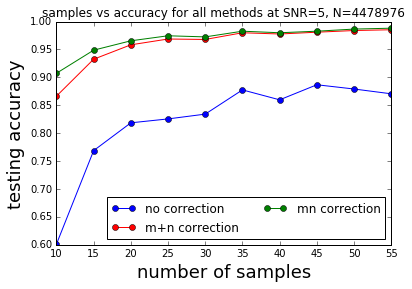

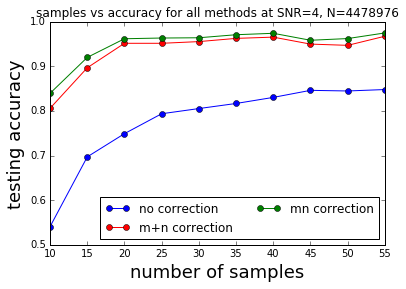

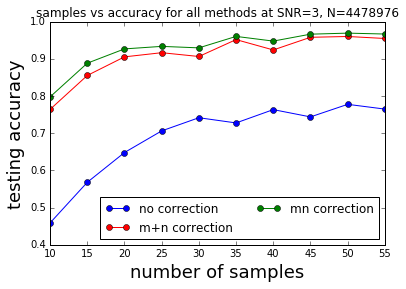

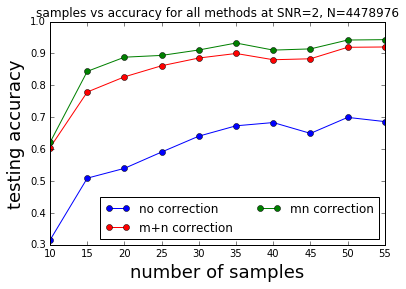

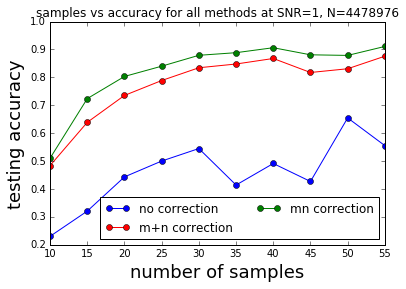

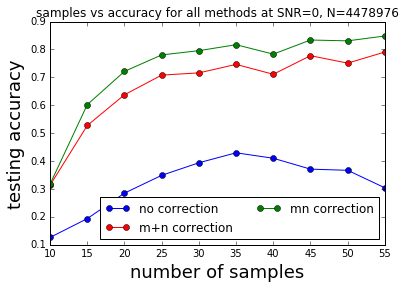

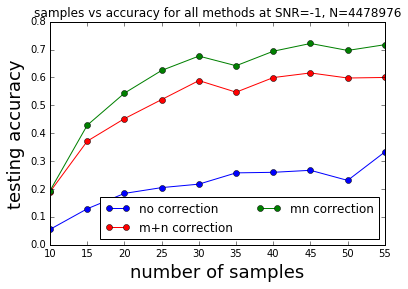

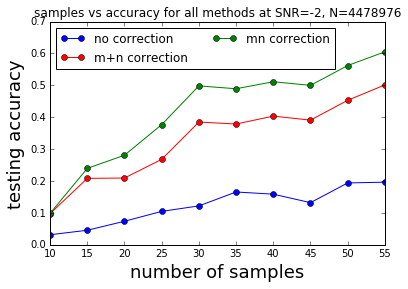

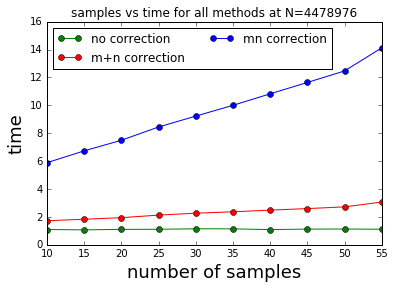

In [3]:
snrs = [5, 4, 3, 2, 1, 0, -1, -2]
all_ms = [[a, a + 5] for a in range(10, 60, 5)] 
bases, exps = [2, 3], [11, 7]
N = (bases[0] ** exps[0]) * (bases[1] ** exps[1])

print('mapping from samples per feedfwd to total samples needed:')
print([(ms, size_indices_lohi(N, ms, bases, exps)) for ms in all_ms])

for i in range(len(snrs)):
    colors = (1, i/len(snrs), 1)
    plt.plot([a[0] for a in all_ms], np.load('../data/accuracy_zerobit_SNR{}.npy'.format(snrs[i])), marker='.', color=colors, label=str(snrs[i]))
plt.xlabel('number of samples', fontsize=18)
plt.ylabel('testing accuracy (no correction)', fontsize=14)
plt.title('accuracy at snrs for no correction at N={}'.format(N))
plt.legend(loc='best',
           ncol=3)
plt.show()

for i in range(len(snrs)):
    colors = (1, i/len(snrs), 1)
    plt.plot([a[0] for a in all_ms], np.load('../data/accuracy_onebit_SNR{}.npy'.format(snrs[i])), marker='.', color=colors, label=str(snrs[i]))
plt.xlabel('number of samples', fontsize=18)
plt.ylabel('testing accuracy (m+n correction)', fontsize=14)
plt.title('accuracy at snrs for o(m+n) bit correction at N={}'.format(N))
plt.legend(loc='best',
           ncol=3)
plt.show()
for i in range(len(snrs)):
    colors = (1, i/len(snrs), 1)
    plt.plot([a[0] for a in all_ms], np.load('../data/accuracy_twobit_SNR{}.npy'.format(snrs[i])), marker='.', color=colors, label=str(snrs[i]))
plt.xlabel('number of samples', fontsize=18)
plt.ylabel('testing accuracy (mn correction)', fontsize=14)
plt.title('accuracy at snrs for o(mn) correction at N={}'.format(N))
plt.legend(loc='best',
           ncol=3)

plt.show()

for SNRdB in snrs:
    plt.plot([a[0] for a in all_ms], np.load('../data/accuracy_zerobit_SNR{}.npy'.format(SNRdB)), '-bo', label='no correction')
    plt.plot([a[0] for a in all_ms], np.load('../data/accuracy_onebit_SNR{}.npy'.format(SNRdB)), '-ro', label='m+n correction')
    plt.plot([a[0] for a in all_ms], np.load('../data/accuracy_twobit_SNR{}.npy'.format(SNRdB)), '-go', label='mn correction')
    plt.xlabel('number of samples', fontsize=18)
    plt.ylabel('testing accuracy', fontsize=18)
    plt.title('samples vs accuracy for all methods at SNR={}, N={}'.format(SNRdB, N))
    plt.legend(loc='best',
               ncol=2)
    plt.show()

avg_time_one_bit = np.mean([np.load('../data/times_onebit_SNR{}.npy'.format(SNRdB)) for SNRdB in snrs], axis=0)
avg_time_two_bit = np.mean([np.load('../data/times_twobit_SNR{}.npy'.format(SNRdB)) for SNRdB in snrs], axis=0)
avg_time_zero_bit = np.mean([np.load('../data/times_zerobit_SNR{}.npy'.format(SNRdB)) for SNRdB in snrs], axis=0)
plt.plot([a[0] for a in all_ms], avg_time_zero_bit, '-go', label='no correction')
plt.plot([a[0] for a in all_ms], avg_time_one_bit, '-ro', label='m+n correction')
plt.plot([a[0] for a in all_ms], avg_time_two_bit, '-bo', label='mn correction')
plt.xlabel('number of samples', fontsize=18)
plt.ylabel('time', fontsize=18)
plt.title('samples vs time for all methods at N={}'.format(N))
plt.legend(loc='best',
           ncol=2)
plt.show()

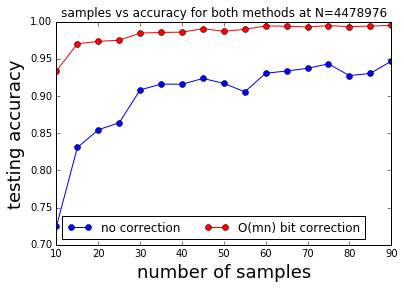

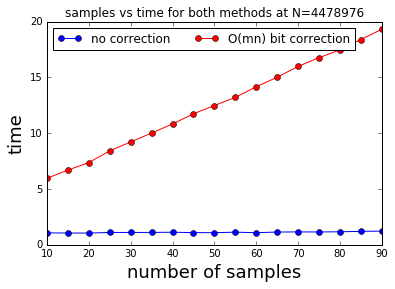

In [4]:
# OLD PLOTS

snrs = [6, 5, 4, 3, 2, 1, 0, -1, -2]
all_ms = [[a, a + 5] for a in range(10, 95, 5)] 
bases, exps = [2, 3], [11, 7]
N = (bases[0] ** exps[0]) * (bases[1] ** exps[1])
acc_small, acc_full = np.load('../data/accuracy_small_SNR6.npy')[:-1], np.load('../data/accuracy_full_SNR6.npy')[:-1]
time_small, time_full = np.load('../data/times_small_SNR6.npy')[:-1], np.load('../data/times_full_SNR6.npy')[:-1]
plt.plot([a[0] for a in all_ms], acc_small, '-bo', label='no correction')
plt.plot([a[0] for a in all_ms], acc_full, '-ro', label='O(mn) bit correction')
plt.xlabel('number of samples', fontsize=18)
plt.ylabel('testing accuracy', fontsize=18)
plt.title('samples vs accuracy for both methods at N={}'.format(N))
plt.legend(loc='best',
           ncol=2)
plt.show()
plt.plot([a[0] for a in all_ms], time_small, '-bo', label='no correction')
plt.plot([a[0] for a in all_ms], time_full, '-ro', label='O(mn) bit correction')
plt.xlabel('number of samples', fontsize=18)
plt.ylabel('time', fontsize=18)
plt.title('samples vs time for both methods at N={}'.format(N))
plt.legend(loc='best',
           ncol=2)
plt.show()